# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1151]:
# Library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing dan feature selection
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold

# Untuk clustering dan evaluasi model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Untuk visualisasi dengan PCA
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [1152]:
df = pd.read_csv("https://raw.githubusercontent.com/faarismuda/Clustering-Shop-Customers/main/Dataset/shop_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [1153]:
# Melihat informasi umum
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None


In [1154]:
# Memeriksa nilai yang hilang
print("\nJumlah Nilai yang Hilang per Kolom:")
print(df.isnull().sum())


Jumlah Nilai yang Hilang per Kolom:
CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


Terdapat missing value pada profession

In [1155]:
# Memeriksa nilai terduplikat
print("\nJumlah Nilai yang terduplikat:")
print(df.duplicated().sum())


Jumlah Nilai yang terduplikat:
0


In [1156]:
# Statistik Deskriptif
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


*   Terdapat umur 0
*   Terdapat pemasukkan 0



In [1157]:
# Melihat nilai unik
print("\nCek Nilai Unik:")
print(df.nunique())


Cek Nilai Unik:
CustomerID                2000
Gender                       2
Age                        100
Annual Income ($)         1786
Spending Score (1-100)     101
Profession                   9
Work Experience             18
Family Size                  9
dtype: int64


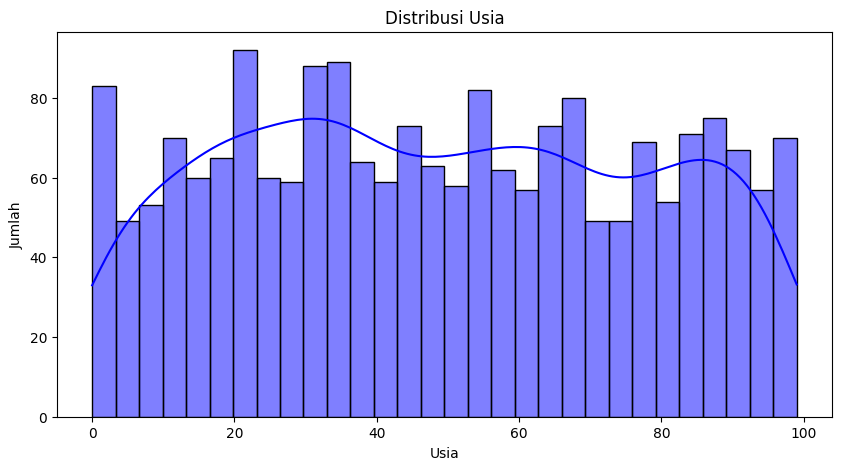

In [1158]:
# Distribusi usia customers
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

<ipython-input-1159-7c7ba083629c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


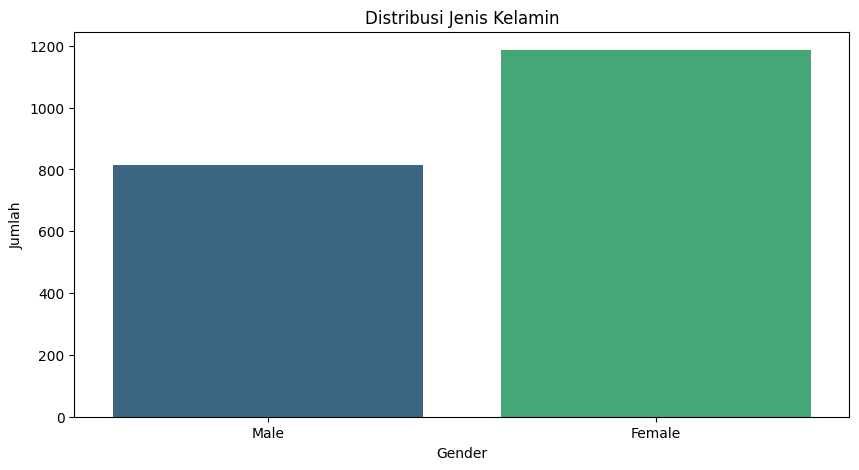

In [1159]:
# Distribusi gender
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [1160]:
df.dropna(subset=['Profession'], inplace=True)
print("\nSetelah Menghapus missing value, Total Baris:", len(df))


Setelah Menghapus missing value, Total Baris: 1965


In [1161]:
# Rata-rata umur pada tiap profesi
df.groupby(by='Profession').agg({'Age':'mean'})

,Age
Profession,
Artist,49.004902
Doctor,46.621118
Engineer,55.094972
Entertainment,51.162393
Executive,46.601307
Healthcare,47.843658
Homemaker,45.366667
Lawyer,47.753521
Marketing,45.823529


In [1162]:
# Substitusi profesi umur = 0 dengan nilai rata-rata pada tiap profesi
df.loc[
    ((df['Profession'] == 'Artist') & (df['Age']==0)), 'Age'] = 49
df.loc[
    ((df['Profession'] == 'Marketing') & (df['Age']==0)), 'Age'] = 46
df.loc[
    ((df['Profession'] == 'Lawyer') & (df['Age']==0)), 'Age'] = 48
df.loc[
    ((df['Profession'] == 'Doctor') & (df['Age']==0)), 'Age'] = 47
df.loc[
    ((df['Profession'] == 'Entertainment') & (df['Age']==0)), 'Age'] = 51
df.loc[
    ((df['Profession'] == 'Engineer') & (df['Age']==0)), 'Age'] = 55
df.loc[
    ((df['Profession'] == 'Healthcare') & (df['Age']==0)), 'Age'] = 48
df.loc[
    ((df['Profession'] == 'Executive') & (df['Age']==0)), 'Age'] = 47

In [1163]:
# Data dengan pemasukan = 0
df[df['Annual Income ($)']==0]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
169,170,Male,32,0,63,Artist,2,2
246,247,Male,23,0,96,Doctor,1,3


In [1164]:
# Rata-rata income pada tiap profesi
df.groupby(by='Profession').agg({'Annual Income ($)':'mean'})

,Annual Income ($)
Profession,
Artist,108776.580065
Doctor,111573.217391
Engineer,111161.240223
Entertainment,110650.333333
Executive,113770.130719
Healthcare,112574.041298
Homemaker,108758.616667
Lawyer,110995.838028
Marketing,107994.211765


In [1165]:
# Substitusi pemasukan profesi = 0 dengan nilai rata-rata pada tiap profesi
df.loc[
    ((df['Profession'] == 'Artist') & (df['Annual Income ($)']==0)), 'Annual Income ($)'] = 108776.58
df.loc[
    ((df['Profession'] == 'Doctor') & (df['Annual Income ($)']==0)), 'Annual Income ($)'] = 111573.21

<ipython-input-1165-38627c58031b>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '108776.58' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[


In [1166]:
# Menghapus umur kurang dari 17
df= df[df['Age']>=18]


Deteksi dan Penghapusan Outlier per Kolom (metode IQR):
Kolom 'CustomerID': 0 outlier terdeteksi.
Kolom 'Age': 0 outlier terdeteksi.
Kolom 'Annual Income ($)': 0 outlier terdeteksi.
Kolom 'Spending Score (1-100)': 0 outlier terdeteksi.
Kolom 'Work Experience': 5 outlier terdeteksi.
Kolom 'Family Size': 0 outlier terdeteksi.


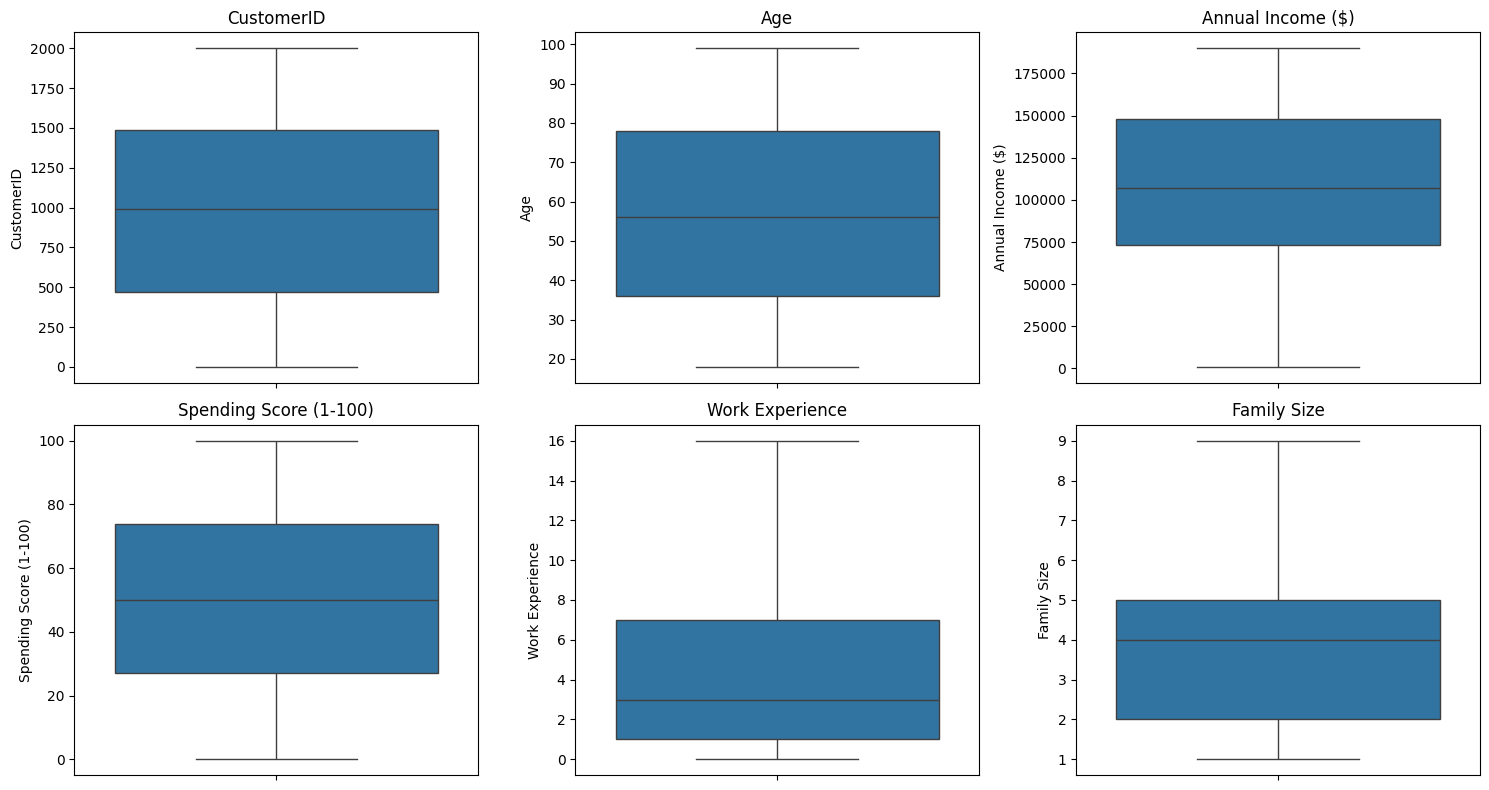

In [1167]:
# Pilih kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nDeteksi dan Penghapusan Outlier per Kolom (metode IQR):")
for col in numeric_cols:
    # Hitung kuartil dan IQR untuk kolom tersebut
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Deteksi outlier pada kolom ini (dari data asli)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Kolom '{col}': {len(outliers)} outlier terdeteksi.")

    # Hapus baris-baris yang mengandung outlier di kolom tersebut
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Visualisasi boxplot untuk tiap kolom numerik setelah penghapusan outlier per kolom
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, (len(numeric_cols)+1)//2, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [1168]:
# Jumlah baris
jumlah_baris = len(df)
print(f"Jumlah baris: {jumlah_baris}")

Jumlah baris: 1656


In [1169]:
# Ubah kategorikal menjadi angka
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# CustomerID tidak digunakan dalam clustering
df = df.drop('CustomerID', axis=1)

print("\nDataset setelah encoding dan drop CustomerID:")
df.head()


Dataset setelah encoding dan drop CustomerID:


,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,19,15000.0,39,5,1,4
1,1,21,35000.0,81,2,3,3
2,0,20,86000.0,6,2,1,1
3,0,23,59000.0,77,7,0,2
4,0,31,38000.0,40,3,2,6


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [1170]:
# Inisialisasi VarianceThreshold dengan threshold=0.0 (menghapus fitur dengan variansi nol)
selector = VarianceThreshold(threshold=0.0)
features_selected = selector.fit_transform(df_features)

print("\nBentuk fitur setelah seleksi:", features_selected.shape)


Bentuk fitur setelah seleksi: (1656, 17)


In [1171]:
# Menentukan jumlah cluster optimal dengan Elbow Method dan Silhouette Score
wcss = []             # Untuk menyimpan Within-Cluster Sum of Squares
silhouette_scores = []  # Untuk menyimpan nilai Silhouette Score

# Mencoba k dari 2 hingga 5
k_values = range(2, 6)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_selected)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(features_selected, labels)
    silhouette_scores.append(score)
    print(f"Untuk k = {k}: WCSS = {kmeans.inertia_:.2f}, Silhouette Score = {score:.2f}")

Untuk k = 2: WCSS = 4922417581457.11, Silhouette Score = 0.61
Untuk k = 3: WCSS = 2525008182824.28, Silhouette Score = 0.56
Untuk k = 4: WCSS = 1512695364216.75, Silhouette Score = 0.54
Untuk k = 5: WCSS = 909067260436.71, Silhouette Score = 0.56


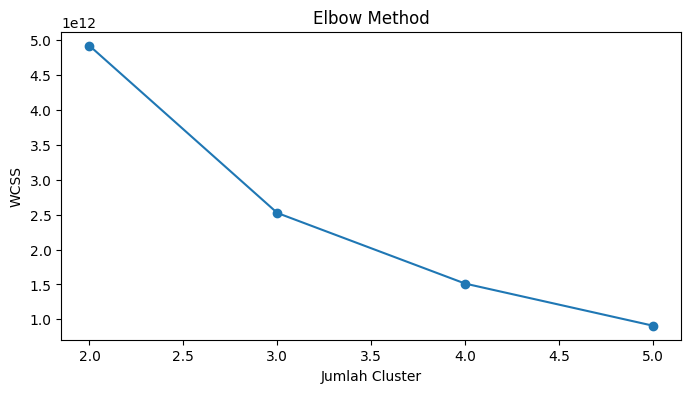

In [1172]:
# Plot Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(list(k_values), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster")
plt.ylabel("WCSS")
plt.show()

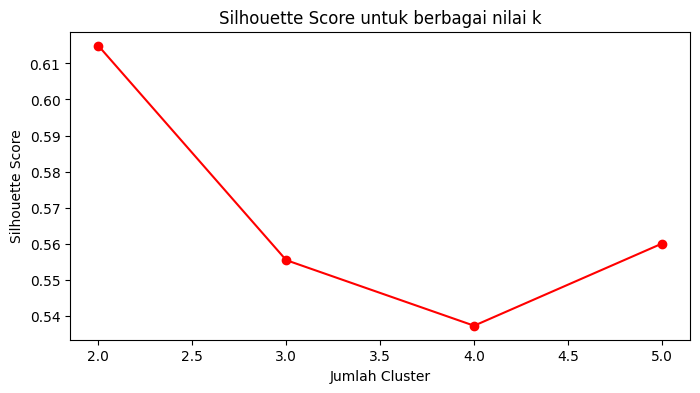

In [1173]:
# Plot Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(list(k_values), silhouette_scores, marker='o', color='red')
plt.title("Silhouette Score untuk berbagai nilai k")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [1174]:
# Menentukan jumlah cluster optimal berdasarkan nilai silhouette tertinggi
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"\nJumlah cluster optimal: {optimal_k}")


Jumlah cluster optimal: 2


In [1175]:
# Membangun model K-Means dengan jumlah cluster optimal
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(features_selected)

# Menambahkan label cluster ke dataset asli (atau dataset fitur)
df_features['Cluster'] = cluster_labels
print("\nDataset dengan label cluster:")
print(df_features.head())


Dataset dengan label cluster:
   Gender  Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0       0   19            15000.0                      39                1   
1       0   21            35000.0                      81                3   
2       1   20            86000.0                       6                1   
3       1   23            59000.0                      77                0   
4       1   31            38000.0                      40                2   

   Family Size  Profession_Doctor  Profession_Engineer  \
0            4              False                False   
1            3              False                 True   
2            1              False                 True   
3            2              False                False   
4            6              False                False   

   Profession_Entertainment  Profession_Executive  Profession_Healthcare  \
0                     False                 False                   True   

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [1176]:
score = silhouette_score(features_selected, cluster_labels)
print(f"Silhouette Score dari model clustering: {score:.2f}")

Silhouette Score dari model clustering: 0.61


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [1177]:
# Pipeline berbeda, sudah dilakukan sebelum tahap menentukan jumlah cluster

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

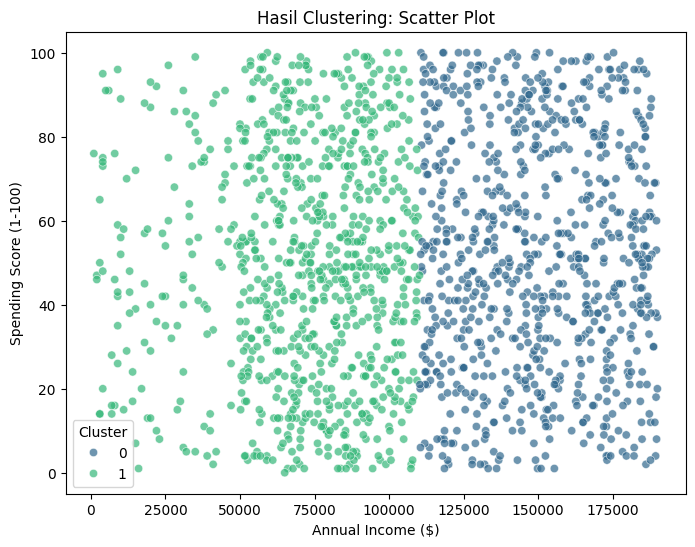

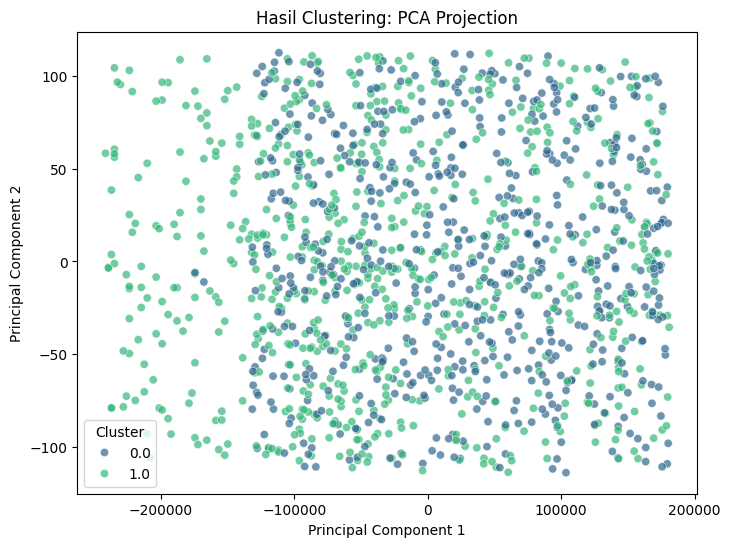

In [1178]:
# Visualisasi hasil clustering dengan scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_features['Annual Income ($)'], y=df_features['Spending Score (1-100)'], hue=df_features['Cluster'], palette='viridis', alpha=0.7)
plt.title("Hasil Clustering: Scatter Plot")
plt.xlabel("Annual Income ($)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()

# Visualisasi hasil clustering dengan PCA Projection
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_features.drop(columns=['Cluster']))

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_features['Cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='viridis', alpha=0.7)
plt.title("Hasil Clustering: PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [1179]:
# Menambahkan label cluster ke dataset asli jika belum dilakukan
df_features['Cluster'] = cluster_labels

# Menghitung rata-rata setiap fitur untuk setiap cluster
cluster_summary = df_features.groupby('Cluster').mean()

# Menampilkan hasil analisis karakteristik setiap cluster
for cluster in cluster_summary.index:
    print(f"Cluster {cluster}:")
    print(f"Rata-rata Pemasukan: {cluster_summary.loc[cluster, 'Annual Income ($)']:.2f}")
    print(f"Rata-rata Spending Score: {cluster_summary.loc[cluster, 'Spending Score (1-100)']:.2f}")
    print(f"Rata-rata Usia: {cluster_summary.loc[cluster, 'Age']:.2f}")
    print(f"Rata-rata Ukuran Keluarga: {cluster_summary.loc[cluster, 'Family Size']:.2f}")
    print("\n")


Cluster 0:
Rata-rata Pemasukan: 149499.34
Rata-rata Spending Score: 51.62
Rata-rata Usia: 59.04
Rata-rata Ukuran Keluarga: 3.93


Cluster 1:
Rata-rata Pemasukan: 71111.88
Rata-rata Spending Score: 49.49
Rata-rata Usia: 54.88
Rata-rata Ukuran Keluarga: 3.56




Tulis hasil interpretasinya di sini.
1. Cluster 0:
Cluster ini kemungkinan terdiri dari profesional senior atau eksekutif yang telah mencapai puncak karier mereka, memiliki keuangan yang stabil, tetapi tidak terlalu konsumtif dalam pengeluaran sehari-hari.

2. Cluster 1:
Cluster ini kemungkinan terdiri dari individu dengan pendapatan menengah ke atas yang masih aktif bekerja tetapi tidak memiliki kebebasan finansial sebesar Cluster 0. Mereka juga cenderung memiliki pola pengeluaran yang bijaksana.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [1180]:
# Simpan hasil clustering ke dalam file CSV
df_features.to_csv('clustering_results.csv', index=False)